<a href="https://colab.research.google.com/github/umamahesh666/Customer_churn_prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SCIENCE PROJECT**




**CUSTOMER CHURN PREDICTION**

***What is Customer Churn?***

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

Importing Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

You can find Customer churn prediction here [Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

Loading Dataset

In [6]:
df = pd.read_csv("/content/Telco-Customer-Churn_dataset.csv")
df.head()
#head function will return top 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape
#shape function is used to find no of rows and no of columns in dataset

(7043, 21)

In [8]:
df.dtypes
#dtypes function is used to find the datatype of each attribute in the dataset

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.drop('customerID',axis=1,inplace=True)
#drop function is used to drop or remove the attribute from the dataset

In [10]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
for col in df:
  print(f'{col} :{df[col].unique()}')
#unique function help us to know the unique values for particular attribute

gender :['Female' 'Male']
SeniorCitizen :[0 1]
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [12]:
df[df.TotalCharges==' '].shape
#11 null values present in the TotalCharges attribute

(11, 20)

In [13]:
df['TotalCharges'].values
#values are strings, datatype is object which is not suitable to train the machine learning model

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
#to_numeric function is used to convert the values for particular attribute into numeric values

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [15]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
#isnull() function used to find whether the value is null value or not

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
df.shape

(7043, 20)

In [17]:
df1 = df[~pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
df1.head()
#dropping the null values present in the TotalCharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df1.shape
#we can observe that decrease in no of rows

(7032, 20)

In [19]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [20]:
df1['TotalCharges'].values
#here we can observe the TotalCharges values are changed to numeric

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [21]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
def unique_col_non_numeric_values(df1):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [23]:
unique_col_non_numeric_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [24]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)


In [25]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [26]:
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)
#Here we are replacing all the 'YES' values with 1 and 'NO' values with 0

In [27]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [28]:
df1['gender'].replace({'Male':1,'Female':0},inplace=True)
#Here we are replacing all the 'MALE' values with 1 and 'FEMALE' values with 0

In [29]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


**ONE HOT ENCODING**

In [30]:
df2 = pd.get_dummies(data = df1,columns =['InternetService','Contract','PaymentMethod'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [31]:
df2.shape
#Here we can observe the increase in no of columns

(7032, 27)

In [32]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [33]:
df2.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

Saving the preprocessed file

In [34]:
df2.to_excel(r'preprocessed_file.xlsx')

In [35]:
df2.rename(columns={'Contract_Month-to-month':'Contract_Month_to_month',
                   'Contract_One year':'Contract_One_year',
                   'Contract_Two year':'Contract_Two_year'},inplace=True)
#Replacing the column names

In [36]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

**VISULAZATION**

Count plots

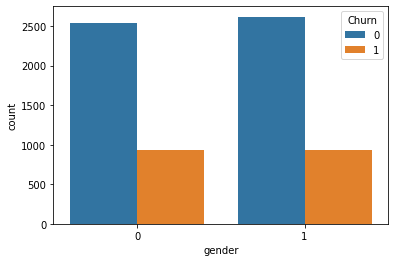

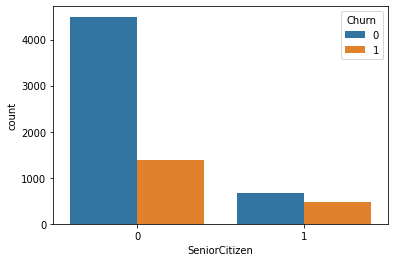

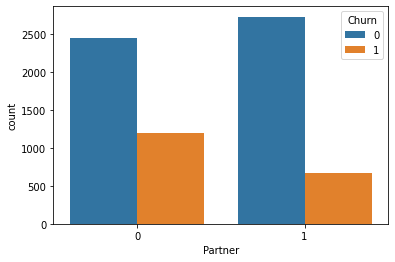

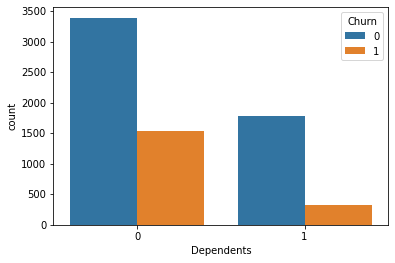

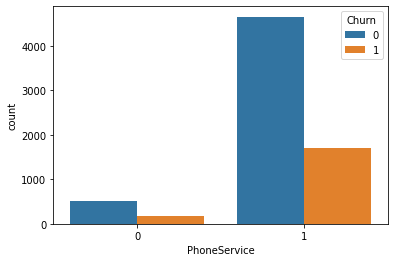

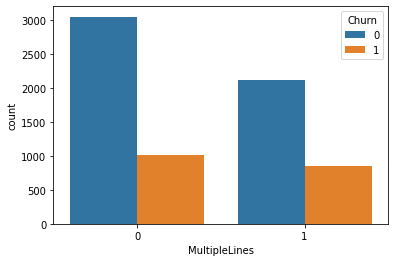

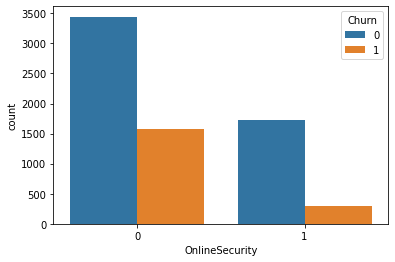

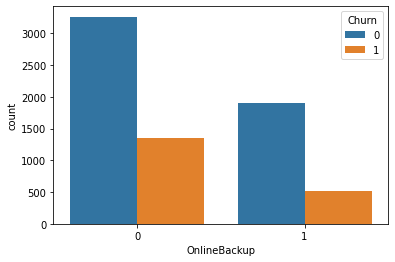

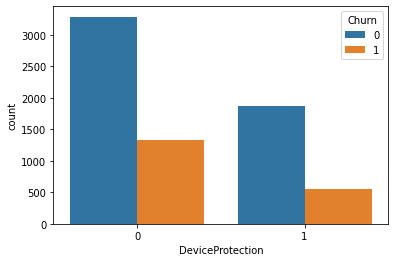

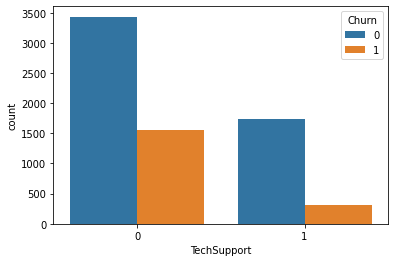

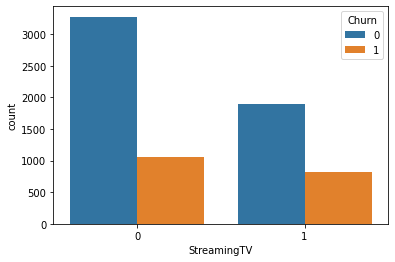

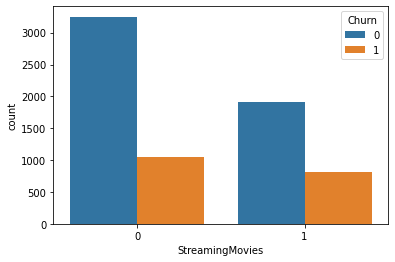

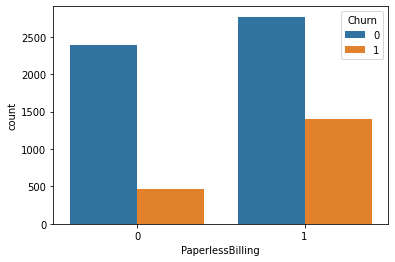

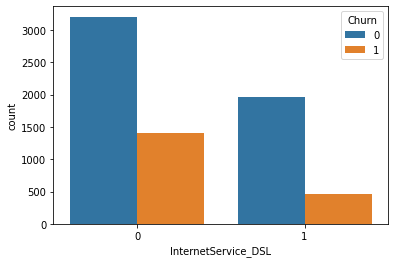

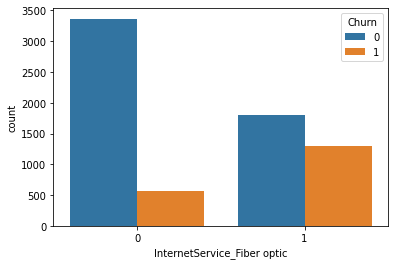

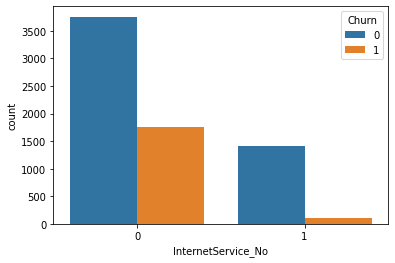

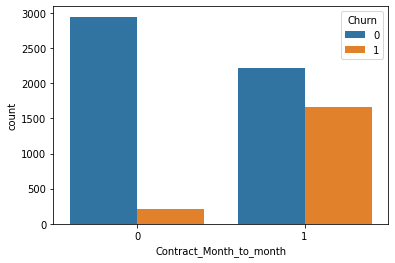

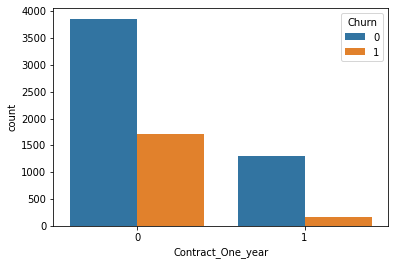

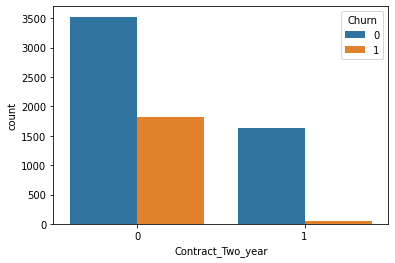

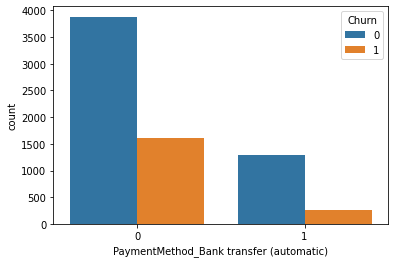

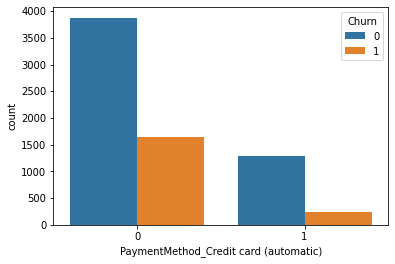

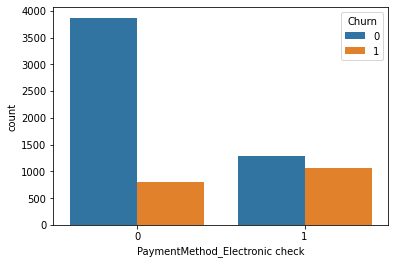

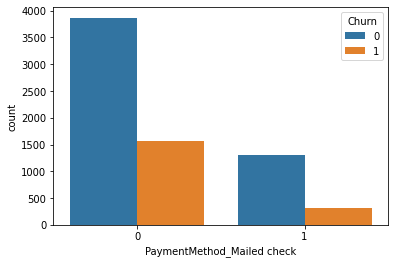

In [37]:
for i, predictor in enumerate(df2.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges','tenure'])):
    plt.figure(i)
    sns.countplot(data=df2, x=predictor, hue='Churn')

**Kernel Density Plot in seaborn**


*Observation: Distribution of monthly_charges for Churned examples and the Distribution of monthly_charges for Not_churned examples are not completely overlapping. Higher number of samples are churning when the day_charge is higher then 60.*

Text(0.5, 1.0, 'Monthly charges by churn')

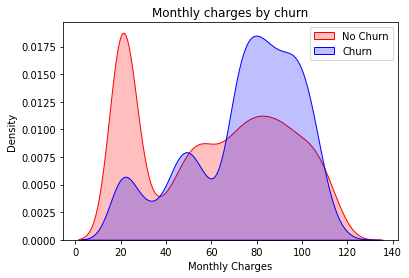

In [38]:
Mth = sns.kdeplot(df2.MonthlyCharges[(df2["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df2.MonthlyCharges[(df2["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Bar chart

<AxesSubplot:>

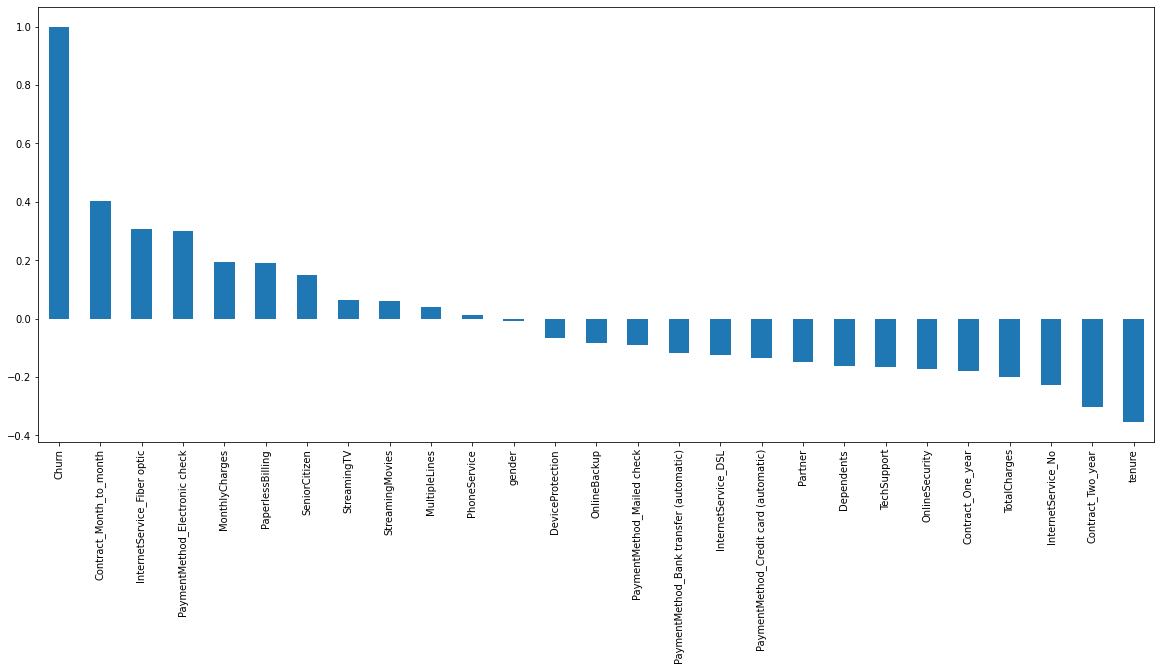

In [39]:
plt.figure(figsize=(20,8))
df2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**MODEL BUILDING**

In [40]:
x = df2.drop('Churn',axis=1)

In [41]:
y = df2['Churn']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=20,stratify=y)

In [44]:
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

**Decision Tree Classifier**



In [45]:
model_dt = DecisionTreeClassifier(criterion = "gini",random_state=500,max_depth=6, min_samples_leaf=8)

In [46]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=500)

In [47]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [48]:
model_dt.score(x_test,y_test)

0.7821387940841866

In [49]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1291
           1       0.60      0.55      0.57       467

    accuracy                           0.78      1758
   macro avg       0.72      0.71      0.71      1758
weighted avg       0.78      0.78      0.78      1758



In [50]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [51]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [52]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [53]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)

In [54]:
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9388984509466437
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       533
           1       0.94      0.94      0.94       629

    accuracy                           0.94      1162
   macro avg       0.94      0.94      0.94      1162
weighted avg       0.94      0.94      0.94      1162



**Random Forest Classifier**

RF is an created using an ensemble technique called bagging (Boostrap aggregation). In RF we have to tune two parameters max_depth (the maximum depth of the tree) and n_estimators (the number of trees in the forest).There is one more thing that can be done easily with RF, getting the most important features.


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8,)

In [57]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [58]:
y_pred=model_rf.predict(x_test)

In [59]:
model_rf.score(x_test,y_test)

0.7986348122866894

In [60]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [61]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [62]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [63]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [64]:
yr_predict1 = model_rf_smote.predict(xr_test1)


In [65]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [66]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9368512110726643
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       550
           1       0.92      0.96      0.94       606

    accuracy                           0.94      1156
   macro avg       0.94      0.94      0.94      1156
weighted avg       0.94      0.94      0.94      1156



Neural Networks


In [67]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
165/165 [==============================] - 1s 2ms/step - loss: 2.4299 - accuracy: 0.6303
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.7389
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7698
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.7609
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.7677
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.7679
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.7630
Epoch 8/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7761
Epoch 9/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5103 - accuracy: 0.7763
Epoch 10/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5236 - accura

Text(69.0, 0.5, 'Truth')

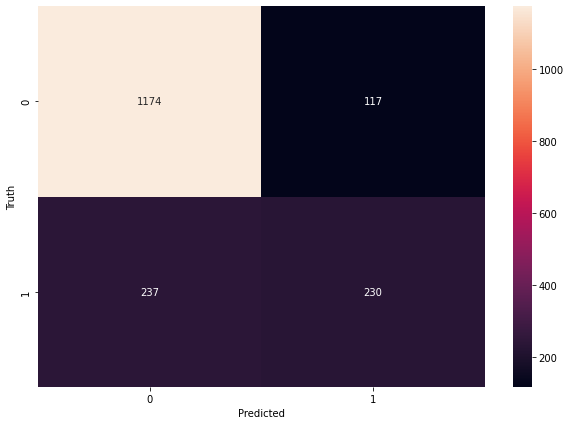

In [68]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
accuracy = (1174+230)/(1174+117+237+230)

In [70]:
accuracy

0.7986348122866894

In [71]:
import pickle
filename = "model.sav"
pickle.dump(model_rf_smote,open(filename,"wb"))

In [72]:
model = pickle.load(open(filename,'rb'))

In [73]:
model.predict(xr_test1)

array([1, 1, 1, ..., 0, 0, 1])